<h2 id="Contents">Contents<a href="#Contents"></a></h2>
        <ol>
        <li><a class="" href="#Imports">Imports</a></li>
<li><a class="" href="#Notation">Notation</a></li>
<li><a class="" href="#Outline">Outline</a></li>
<li><a class="" href="#Forward-Propagation">Forward Propagation</a></li>
<ol><li><a class="" href="#Initialization">Initialization</a></li>
<ol><li><a class="" href="#Getting-the-Shapes-Right">Getting the Shapes Right</a></li>
<li><a class="" href="#initialize_parameters_deep">initialize_parameters_deep</a></li>
</ol><li><a class="" href="#Activation-Functions">Activation Functions</a></li>
<ol><li><a class="" href="#relu">relu</a></li>
<li><a class="" href="#sigmoid">sigmoid</a></li>
</ol><li><a class="" href="#Stacking-Linear-Layer-with-Activation">Stacking Linear Layer with Activation</a></li>
<ol><li><a class="" href="#linear_forward">linear_forward</a></li>
<li><a class="" href="#linear_activation_forward">linear_activation_forward</a></li>
<li><a class="" href="#L_model_forward">L_model_forward</a></li>
</ol></ol><li><a class="" href="#The-Cost">The Cost</a></li>
<li><a class="" href="#Backpropagation">Backpropagation</a></li>
<ol><li><a class="" href="#Linear-Backward">Linear Backward</a></li>
<ol><li><a class="" href="#linear_backward">linear_backward</a></li>
</ol><li><a class="" href="#Backpropagation-for-Activation-Functions">Backpropagation for Activation Functions</a></li>
<ol><li><a class="" href="#relu_backward">relu_backward</a></li>
<li><a class="" href="#sigmoid_backward">sigmoid_backward</a></li>
</ol><li><a class="" href="#Linear-Activation-Backward">Linear-Activation Backward</a></li>
<ol><li><a class="" href="#linear_activation_backward">linear_activation_backward</a></li>
</ol><li><a class="" href="#L-Model-Backward">L-Model Backward</a></li>
<ol><li><a class="" href="#L_model_backward">L_model_backward</a></li>
</ol><li><a class="" href="#Update-Parameters">Update Parameters</a></li>
<ol><li><a class="" href="#update_parameters">update_parameters</a></li>
</ol><li><a class="" href="#The-Model">The Model</a></li>
<ol><li><a class="" href="#L_layer_model">L_layer_model</a></li>
<li><a class="" href="#Train-the-model">Train the model</a></li>
<ol><li><a class="" href="#Creating-the-Dataset">Creating the Dataset</a></li>
</ol>

# Imports

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
plt.rcdefaults()


# Notation

Here are the notation we'll using in this notebook:
- Superscript $[l]$ denotes a quantity associated with the $l^{th}$ layer. 
    - Example: $a^{[L]}$ is the $L^{th}$ layer activation. $W^{[L]}$ and $b^{[L]}$ are the $L^{th}$ layer parameters.
- Superscript $(i)$ denotes a quantity associated with the $i^{th}$ example. 
    - Example: $x^{(i)}$ is the $i^{th}$ training example.
- Lowerscript $i$ denotes the $i^{th}$ entry of a vector.
    - Example: $a^{[l]}_i$ denotes the $i^{th}$ entry of the $l^{th}$ layer's activations).

The idea is to create some helper functions which will be used later to create an arbitrarily deep neural network.

# Outline

Here's an outline of the steps in this assignment:

- Initialize the parameters for an $L$-layer neural network
- Implement the forward propagation module (shown in purple in the figure below)
     - Complete the LINEAR part of a layer's forward propagation step (resulting in $Z^{[l]}$).
     - Implement the activation functions (relu/sigmoid)
     - Combine the previous two steps into a new [LINEAR->ACTIVATION] forward function.
     - Stack the [LINEAR->RELU] forward function L-1 time (for layers 1 through L-1) and add a [LINEAR->SIGMOID] at the end (for the final layer $L$). This gives you a new `L_model_forward` function.
- Compute the loss
- Implement the backward propagation module (denoted in red in the figure below)
    - Complete the LINEAR part of a layer's backward propagation step
    - Create functions for the gradient of the ACTIVATE function(relu_backward/sigmoid_backward) 
    - Combine the previous two steps into a new [LINEAR->ACTIVATION] backward function
    - Stack [LINEAR->RELU] backward L-1 times and add [LINEAR->SIGMOID] backward in a new `L_model_backward` function
- Finally, update the parameters.

<img src="images/0201.png" style="width:800px;height:500px;">
<caption><center><b>Outline</b></center></caption>

For every forward function, there is a corresponding backward function. This is why at every step of your forward module you will be storing some values in a cache. These cached values are useful for computing gradients.

In the backpropagation module, you can then use the cache to calculate the gradients. Don't worry, this assignment will show you exactly how to carry out each of these steps!

Let's get started!

# Forward Propagation

## Initialization

### Getting the Shapes Right

Before we create a function to initialize the parameters, we should make sure that the weights are of the correct shape. Assuming  the size of your input $X$ is $(12288, 209)$ (with $m=209$ examples) then the shapes of weights and biases of various layers should be:
<table style="width:100%">
    <tr>
        <td>  </td> 
        <td> <b>Shape of W</b> </td> 
        <td> <b>Shape of b</b>  </td> 
        <td> <b>Activation</b> </td>
        <td> <b>Shape of Activation</b> </td> 
    <tr>
    <tr>
        <td> <b>Layer 1</b> </td> 
        <td> $(n^{[1]},12288)$ </td> 
        <td> $(n^{[1]},1)$ </td> 
        <td> $Z^{[1]} = W^{[1]}  X + b^{[1]} $ </td> 
        <td> $(n^{[1]},209)$ </td> 
    <tr>
    <tr>
        <td> <b>Layer 2</b> </td> 
        <td> $(n^{[2]}, n^{[1]})$  </td> 
        <td> $(n^{[2]},1)$ </td> 
        <td>$Z^{[2]} = W^{[2]} A^{[1]} + b^{[2]}$ </td> 
        <td> $(n^{[2]}, 209)$ </td> 
    <tr>
       <tr>
        <td> $\vdots$ </td> 
        <td> $\vdots$  </td> 
        <td> $\vdots$  </td> 
        <td> $\vdots$</td> 
        <td> $\vdots$  </td> 
    <tr>  
   <tr>
       <td> <b>Layer L-1</b> </td> 
        <td> $(n^{[L-1]}, n^{[L-2]})$ </td> 
        <td> $(n^{[L-1]}, 1)$  </td> 
        <td>$Z^{[L-1]} =  W^{[L-1]} A^{[L-2]} + b^{[L-1]}$ </td> 
        <td> $(n^{[L-1]}, 209)$ </td> 
   <tr>
   <tr>
       <td> <b>Layer L</b> </td> 
        <td> $(n^{[L]}, n^{[L-1]})$ </td> 
        <td> $(n^{[L]}, 1)$ </td>
        <td> $Z^{[L]} =  W^{[L]} A^{[L-1]} + b^{[L]}$</td>
        <td> $(n^{[L]}, 209)$  </td> 
    <tr>
</table>

Keeping this table in mind, let's initialize the parameters for for an L-layer Neural Network.

### `initialize_parameters_deep`

**Steps**

- The model's structure is *[LINEAR -> RELU] $ \times$ (L-1) -> LINEAR -> SIGMOID*. i.e., it has $L-1$ layers using a ReLU activation function followed by an output layer with a sigmoid activation function.
- Use random initialization for the weight matrices. Use `np.random.randn(shape) * 0.01`.
- Use zeros initialization for the biases. Use `np.zeros(shape)`.
- We'll store $n^{[l]}$, the number of units in different layers, in a variable `layer_dims`. 

In [2]:
def initialize_parameters_deep(layer_dims):
    """
    Arguments
    ---------
    layer_dims : list of ints
        The dimensions of each layer in the network.
    
    Returns
    -------
    parameters : dictionary
        A dictionary containing the parameters of the network.\\
        The dictionary has the following keys:
        * Wl: The weight matrix of shape (layer_dims[l], layer_dims[l-1])
        * bl: The bias vector of shape (layer_dims[l], 1)\\
        for l in range(1, len(layer_dims))
    """
    parameters = {}
    L = len(layer_dims)
    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1])*0.01
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))
        
        assert(parameters['W' + str(l)].shape == (layer_dims[l], layer_dims[l - 1]))
        assert(parameters['b' + str(l)].shape == (layer_dims[l], 1))
        
    return parameters

## Activation Functions

Here, we'll implement the two activation functions that you'll use in the model:
1. **Relu:** $\max(0, x)$
2. **Sigmod:** $\frac{1}{1+e^{-x}}$
The functions will also return the value of `x` as cache to be used in backpropagation.

### `relu`

In [3]:
def relu(x):
    """
    Arguments
    ---------
    x : numpy array
        The input array.
    
    Returns
    -------
    x : numpy array
        The output array.
    """
    return np.maximum(0, x), x

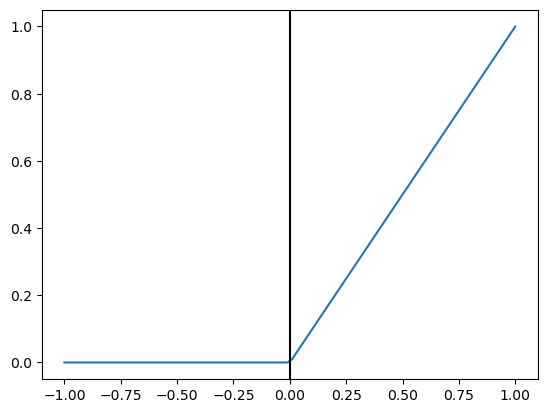

In [4]:
X = np.linspace(-1, 1, 100)
Y, _ = relu(X)
plt.plot(X, Y)
plt.axvline(x=0, color='black')
plt.show()

### `sigmoid`

In [5]:
def sigmoid(x):
    """
    Arguments
    ---------
    x : numpy array
        The input array.

    Returns
    -------
    x : numpy array
    """
    return 1/(1+np.exp(-x)), x

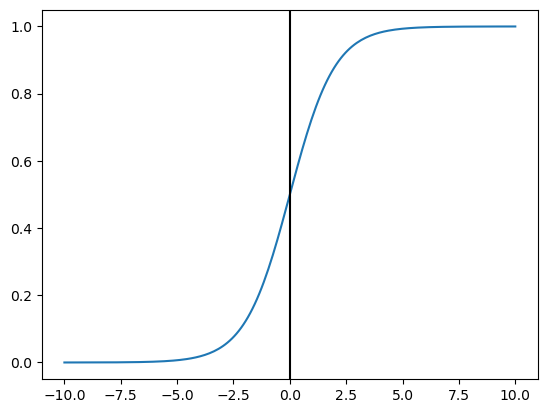

In [6]:
X = np.linspace(-10, 10, 200)
Y, _ = sigmoid(X)
plt.plot(X, Y)
plt.axvline(x=0, color='black')
plt.show()

## Stacking Linear Layer with Activation

Next, we'll be stacking a linear layer with a ReLU activation layer to create one layer of the neural network. We'll also be returning the values of `A`, `W` and `b` as `cache` to be used later during backpropagation.

The output of a unit without any activation function is given by:
$$Z^{[l]} = W^{[l]} A^{[l-1]} + b^{[l]}$$
If $g$ is the activation function, then the activation of a unit is:
$$A^{[l]} = g(Z^{[l]})$$

### `linear_forward`

In [7]:
def linear_forward(A, W, b):
    """
    Implement the linear part of a layer's forward propagation.
    Attributes
    ----------
    A : numpy array
        The input array.
    W : numpy array
        The weight matrix.
    b : numpy array
        The bias vector.
    
    Returns
    -------
    Z : numpy array
        The output array.
    cache : tuple
        A tuple of (A, W, b) to be used in the backward pass.
    """
    Z = np.dot(W, A) + b
    assert (Z.shape == (W.shape[0], A.shape[1])), "Shape of Z is not correct"
    cache = (A, W, b)
    return Z, cache


### `linear_activation_forward`

In [8]:
def linear_activation_forward(A_prev, W, b, activation):
    """
    Implement the forward propagation for the LINEAR->ACTIVATION layer

    Arguments
    ---------
    A_prev : numpy array
        The input array.
    W : numpy array
        The weight matrix.
    b : numpy array
        The bias vector.
    activation : string
        The activation function to use. Available functions are:
        * relu
        * sigmoid

    Returns
    -------
    A : numpy array
        The output array.
    cache : tuple
        a python tuple containing "linear_cache" and "activation_cache"\\
             stored for computing the backward pass efficiently
    """
    
    if activation == "sigmoid":
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = sigmoid(Z)
    
    elif activation == "relu":
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = relu(Z)

    cache = (linear_cache, activation_cache)

    return A, cache

### `L_model_forward`

Now as we have the `linear_activation_forward` function implemented, we can implement the `L_model_forward` function. The function loops through `linear_activation_forward` to  LINEAR->RELU (L-1) times. Also, the function adds the output from the activation function to the cache. After that, the function also implments the LINEAR->SIGMOID as the final layer.

In [9]:
def L_model_forward(X, parameters):
    """
    Implement forward propagation for the [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID computation
    
    Arguments
    ---------
    X : numpy array
        The input data, of shape (input size, number of examples)
    parameters : dictionary
        A dictionary containing the parameters of the network.\\
        The dictionary has the following keys:
        * Wl: The weight matrix of shape (layer_dims[l], layer_dims[l-1])
        * bl: The bias vector of shape (layer_dims[l], 1)\\
        for l in range(1, len(layer_dims))
    
    Returns
    -------
    AL : numpy array
        The output of the forward propagation, of shape (output size, number of examples)
    caches : list
        A list of tuples, where each tuple contains the inputs and outputs of a layer.\\
        For each layer, the tuple contains (A_prev, W, b)
    """

    caches = []
    A = X
    # number of layers in the neural network
    L = len(parameters) // 2                  
    
    for l in range(1, L):
        A_prev = A 
        A, cache = linear_activation_forward(A_prev, parameters[f'W{l}'], parameters[f'b{l}'], 'relu')
        caches.append(cache)
    AL, cache = linear_activation_forward(A, parameters[f'W{L}'], parameters[f'b{L}'], 'sigmoid')
    caches.append(cache)
          
    return AL, caches

# The Cost

Here, we'll implement the cost function for the model. We'll use the cross-entropy cost function $J$, using the following formula: 
$$-\frac{1}{m} \sum\limits_{i = 1}^{m} (y^{(i)}\log\left(a^{[L] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[L](i)}\right))$$

In [10]:
def compute_cost(AL, Y):
    """
    Implement the cost function

    Arguments
    ---------
    AL : numpy array
        The output of the forward propagation, of shape (1, number of examples)
    Y : numpy array
        The true labels, of shape (1, number of examples)
    """
    
    m = Y.shape[1]
    cost = -(np.sum(Y*np.log(AL)+(1-Y)*np.log(1-AL)))/m
    cost = np.squeeze(cost)
    return cost

# Backpropagation

This section will be about implementing the backpropagation algorithm to compute the gradients.
![](images/0202.png)

similarly to forward propagation, you're going to build the backward propagation in three steps:
1. LINEAR backward
2. LINEAR -> ACTIVATION backward where ACTIVATION computes the derivative of either the ReLU or sigmoid activation
3. [LINEAR -> RELU] $\times$ (L-1) -> LINEAR -> SIGMOID backward (whole model)

## Linear Backward

For layer $l$, the linear part is: $Z^{[l]} = W^{[l]} A^{[l-1]} + b^{[l]}$ (followed by an activation).

Suppose you have already calculated the derivative $dZ^{[l]} = \frac{\partial \mathcal{L} }{\partial Z^{[l]}}$. You want to get $(dW^{[l]}, db^{[l]}, dA^{[l-1]})$.

The three outputs $(dW^{[l]}, db^{[l]}, dA^{[l-1]})$ are computed using the input $dZ^{[l]}$.

Here are the formulas:
$$ dW^{[l]} = \frac{\partial \mathcal{J} }{\partial W^{[l]}} = \frac{1}{m} dZ^{[l]} A^{[l-1] T} $$
$$ db^{[l]} = \frac{\partial \mathcal{J} }{\partial b^{[l]}} = \frac{1}{m} \sum_{i = 1}^{m} dZ^{[l](i)}$$
$$ dA^{[l-1]} = \frac{\partial \mathcal{L} }{\partial A^{[l-1]}} = W^{[l] T} dZ^{[l]} $$


### `linear_backward`

In [11]:
# GRADED FUNCTION: linear_backward

def linear_backward(dZ, cache):
    """
    Implement the linear portion of backward propagation for a single layer (layer l)

    Arguments
    ---------
    dZ : numpy array
        The gradient of the cost with respect to the linear output (of current layer l)
    cache : tuple
        A tuple of values (A_prev, W, b) coming from the forward propagation in the current layer
    
    Returns
    -------
    dA_prev : numpy array
        The gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW : numpy array
        The gradient of the cost with respect to W (current layer l), same shape as W
    db : numpy array
        The gradient of the cost with respect to b (current layer l), same shape as b
    """
    A_prev, W, b = cache
    m = A_prev.shape[1]
    dW = np.dot(dZ, A_prev.T)/m
    db = np.sum(dZ,axis = 1, keepdims=True)/m
    dA_prev = np.dot(W.T, dZ)
    
    return dA_prev, dW, db

## Backpropagation for Activation Functions

We'll create two functions to implement the backward propagation for the activation functions, `relu_backward` and `sigmoid_backward`. The function will `dA` as well as `cache` as inputs and return `dZ`.

### `relu_backward`

In [12]:
def relu_backward(dA, cache):
    """
    Implement the backward propagation for a single RELU unit.

    Arguments
    ---------
    dA : numpy array
        post-activation gradient
    cache : tuple
        tuple of values (Z) from forward propagation
    
    Returns
    -------
    dZ : numpy array
        Gradient of the cost with respect to Z
    """
    
    Z = cache
    dZ = np.array(dA, copy=True)
    dZ[Z <= 0] = 0
    assert (dZ.shape == Z.shape)
    return dZ


### `sigmoid_backward`

In [13]:
def sigmoid_backward(dA, cache):
    """
    Implement the backward propagation for a single SIGMOID unit.

    Arguments
    ---------
    dA : numpy array
        post-activation gradient
    cache : tuple
        tuple of values (Z) from forward propagation
    
    Returns
    -------
    dZ : numpy array
        Gradient of the cost with respect to Z
    """
    
    Z = cache
    s = 1/(1+np.exp(-Z))
    dZ = dA * s * (1-s)
    assert (dZ.shape == Z.shape)
    return dZ

##  Linear-Activation Backward

Next, you will create a function that merges the two helper functions: `linear_backward` and the backward step for the activation `linear_activation_backward`.

### `linear_activation_backward`

In [14]:
# GRADED FUNCTION: linear_activation_backward

def linear_activation_backward(dA, cache, activation):
    """
    Implement the backward propagation for the LINEAR->ACTIVATION layer.
    
    Arguments
    ---------
    dA : numpy array
        post-activation gradient for current layer l
    cache : tuple
        tuple of values (linear_cache, activation_cache) we store for computing backward propagation efficiently
    activation : string
        the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"

    Returns
    -------
    dA_prev : numpy array
        Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW : numpy array
        Gradient of the cost with respect to W (current layer l), same shape as W
    db : numpy array
        Gradient of the cost with respect to b (current layer l), same shape as b
    """
    linear_cache, activation_cache = cache
    if activation == "relu":
        dZ = relu_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)     
    elif activation == "sigmoid":
        dZ = sigmoid_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)

    return dA_prev, dW, db

##  L-Model Backward

When we implemented the L_model_forward function, at each iteration, we stored a cache which contains (X,W,b, and z). In the back propagation module, we'll use those variables to compute the gradients. Therefore, in the L_model_backward function, we'll iterate through all the hidden layers backward, starting from layer  L . On each step, we will use the cached values for layer  l  to backpropagate through layer l .

But first, we need an initial value of `dA`, which is the derivative of the cost with respect to the activation of the output layer. This can be calculated using the formula:
$$
dA^{[L]} = -\left(\frac{Y}{A_L}-\frac{1-Y}{1-A_L}\right)
$$
We can then use this post-activation gradient dAL to keep going backward.

### `L_model_backward`

In [15]:
def L_model_backward(AL, Y, caches):
    """
    Implement the backward propagation for the [LINEAR->RELU] * (L-1) -> LINEAR -> SIGMOID group
    
    Arguments
    ---------
    AL : numpy array
        probability vector, output of forward propagation (L_model_forward())
    Y : numpy array
        true "label" vector
    caches : list
        list of caches containing:
            every cache of linear_activation_forward() with "relu" (there are (L-1) ors)
            the cache of linear_activation_forward() with "sigmoid" (there is one)

    Returns
    -------
    grads : dictionary

        grads["dA" + str(l)] = ...\\
        grads["dW" + str(l)] = ...\\
        grads["db" + str(l)] = ...
    """

    grads = {}
    L = len(caches)
    m = AL.shape[1]
    Y = Y.reshape(AL.shape)
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
    
    current_cache = caches[L-1]
    dA_prev_temp, dW_temp, db_temp = linear_activation_backward(dAL, current_cache, 'sigmoid')
    grads["dA" + str(L-1)] = dA_prev_temp
    grads["dW" + str(L)] = dW_temp
    grads["db" + str(L)] = db_temp

    for l in reversed(range(L-1)):
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(dA_prev_temp, current_cache, 'relu')
        grads["dA" + str(l)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp

    return grads

## Update Parameters

In this section, we'll update the parameters of the model, using gradient descent: 

$$ W^{[l]} = W^{[l]} - \alpha \text{ } dW^{[l]}$$
$$ b^{[l]} = b^{[l]} - \alpha \text{ } db^{[l]}$$

where $\alpha$ is the learning rate. 

### `update_parameters`

In [16]:
def update_parameters(params, grads, learning_rate):
    """
    Update parameters using gradient descent
    
    Arguments
    ---------
    params : dictionary
        parameters to be updated
    grads : dictionary
        python dictionary containing your gradients, output of L_model_backward

    Returns
    -------
    params : dictionary
        python dictionary containing your updated parameters after one pass of gradient descent
            parameters["W" + str(l)] = ... \\
            parameters["b" + str(l)] = ...
    """
    parameters = params.copy()
    grads = grads.copy()
    L = len(parameters) // 2
    for l in range(L):
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate*grads["dW" + str(l+1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)]- learning_rate*grads["db" + str(l+1)]

    return parameters

This completes the implementation of the helper functions needed to build a neural network. Next, we'll use those functions to build the model.

# The Model

In this section, we'll build a L-layer neural network with the following structure: *[LINEAR -> RELU] × (L-1) -> LINEAR -> SIGMOID*. 

The number of layers and the number of units in each layer will be determined using the `layers_dims` parameter which is a list containing the number of units in each layer of the network. Let's create the model!

## `L_layer_model`

In [17]:
# GRADED FUNCTION: L_layer_model

def L_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):
    """
    Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.
    
    Arguments
    ---------
    X : numpy array
        (n_x, m) matrix, training examples
    Y : numpy array
        (1, m) matrix, training labels
    layers_dims : list
        dimensions of each layer
    learning_rate : float
        learning rate of the gradient descent update rule
    num_iterations : int
        number of iterations of the optimization loop
    print_cost : bool
        if True, it prints the cost every 100 steps

    Returns
    -------
    parameters : dictionary
        parameters learnt by the model. They can then be used to predict.
    """

    np.random.seed(1)
    costs = []
    parameters = initialize_parameters_deep(layers_dims)
    for i in range(0, num_iterations):
        AL, caches = L_model_forward(X, parameters)
        cost = compute_cost(AL, Y)
        grads = L_model_backward(AL, Y, caches)
        parameters = update_parameters(parameters, grads, learning_rate)
                
        # Print the cost every 100 iterations
        if print_cost and i % 100 == 0 or i == num_iterations - 1:
            print(f"Cost after iteration {i}: {np.squeeze(cost)}")
        if i % 100 == 0 or i == num_iterations:
            costs.append(cost)
    return parameters, costs

## Train the model

### Creating the Dataset

Let's create a dataset to be trained on.

In [26]:
def load_data():
    train_dataset = h5py.File('datasets/train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('datasets/test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [27]:
train_x_orig, train_y, test_x_orig, test_y, classes = load_data()

In [29]:
# Reshape the training and test examples 
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

# Standardize data to have feature values between 0 and 1.
train_x = train_x_flatten/255.
test_x = test_x_flatten/255.

print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))

train_x's shape: (12288, 209)
test_x's shape: (12288, 50)


In [28]:
layers_dims = [12288, 20, 7, 5, 1] #  4-layer model

In [37]:
parameters, costs = L_layer_model(train_x, train_y, layers_dims, learning_rate=0.02, num_iterations = 2500, print_cost = True)

Cost after iteration 0: 0.6931489045172448
Cost after iteration 100: 0.6624971419117535
Cost after iteration 200: 0.651094757435918
Cost after iteration 300: 0.6467572191732891
Cost after iteration 400: 0.6450746296904617
Cost after iteration 500: 0.6444126114559184
Cost after iteration 600: 0.6441496227067939
Cost after iteration 700: 0.6440444862712489
Cost after iteration 800: 0.6440022822578234
Cost after iteration 900: 0.6439852956688383
Cost after iteration 1000: 0.643978446974854
Cost after iteration 1100: 0.6439756825182593
Cost after iteration 1200: 0.643974565630174
Cost after iteration 1300: 0.6439741139342244
Cost after iteration 1400: 0.6439739310230211
Cost after iteration 1500: 0.6439738567187566
Cost after iteration 1600: 0.643973826351625
Cost after iteration 1700: 0.643973813766312
Cost after iteration 1800: 0.6439738083386956
Cost after iteration 1900: 0.6439738057896578
Cost after iteration 2000: 0.6439738043154932
Cost after iteration 2100: 0.6439738031521817
Cost 

In [38]:
def predict(X, y, parameters):
    m = X.shape[1]
    n = len(parameters) // 2 # number of layers in the neural network
    p = np.zeros((1,m))
    
    # Forward propagation
    probas, caches = L_model_forward(X, parameters)

    
    # convert probas to 0/1 predictions
    for i in range(0, probas.shape[1]):
        if probas[0,i] > 0.5:
            p[0,i] = 1
        else:
            p[0,i] = 0
    
    print("Accuracy: "  + str(np.sum((p == y)/m)))
        
    return p

In [39]:
pred_train = predict(train_x, train_y, parameters)

Accuracy: 0.6555023923444976


In [40]:
pred_test = predict(test_x, test_y, parameters)

Accuracy: 0.3400000000000001
